In [1]:
!sudo apt install tesseract-ocr
!pip install pytesseract pillow

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


In [4]:
from PIL import Image
import pytesseract
import requests
from io import BytesIO

In [9]:
from google.colab import files
uploaded = files.upload()


Saving t3qWG.png to t3qWG.png


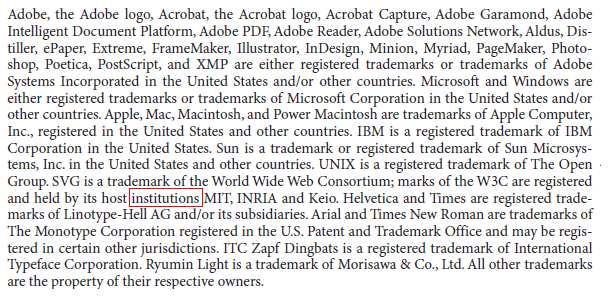

In [10]:
image = Image.open(list(uploaded.keys())[0])
image

In [11]:
text = pytesseract.image_to_string(image)

print("📜 Extracted Text:")
print(text)


📜 Extracted Text:
Adobe, the Adobe logo, Acrobat, the Acrobat logo, Acrobat Capture, Adobe Garamond, Adobe
Intelligent Document Platform, Adobe PDF, Adobe Reader, Adobe Solutions Network, Aldus, Dis-
tiller, ePaper, Extreme, FrameMaker, Illustrator, InDesign, Minion, Myriad, PageMaker, Photo-
shop, Poetica, PostScript, and XMP are either registered trademarks or trademarks of Adobe
‘Systems Incorporated in the United States and/or other countries. Microsoft and Windows are
either registered trademarks or trademarks of Microsoft Corporation in the United States and/or
other countries. Apple, Mac, Macintosh, and Power Macintosh are trademarks of Apple Computer,
Inc,, registered in the United States and other countries. IBM is a registered trademark of IBM
Corporation in the United States. Sun is a trademark or registered trademark of Sun Microsys-
tems, Inc. in the United States and other countries. UNIX is a registered trademark of The Open
Group. SVG is a trademark of the World Wide We

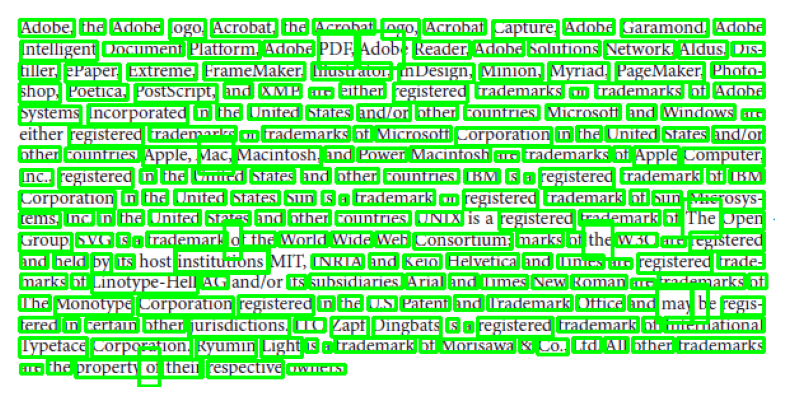

In [12]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Convert PIL image to OpenCV format
cv_image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

# Get word-level data
data = pytesseract.image_to_data(image, output_type=pytesseract.Output.DICT)

# Draw boxes around detected text
for i in range(len(data['text'])):
    if int(data['conf'][i]) > 60:  # Confidence threshold
        x, y, w, h = data['left'][i], data['top'][i], data['width'][i], data['height'][i]
        cv2.rectangle(cv_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(cv_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()
